In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"C:\Users\RAJPAL SINGH\Documents\Data Science ALL\Kaggle\Titanic\train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Frauenthal, Mrs. Henry William (Clara Heinshei...",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


C:\New folder\datascience\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\New folder\datascience\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\New folder\datascience\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\New folder\datascience\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


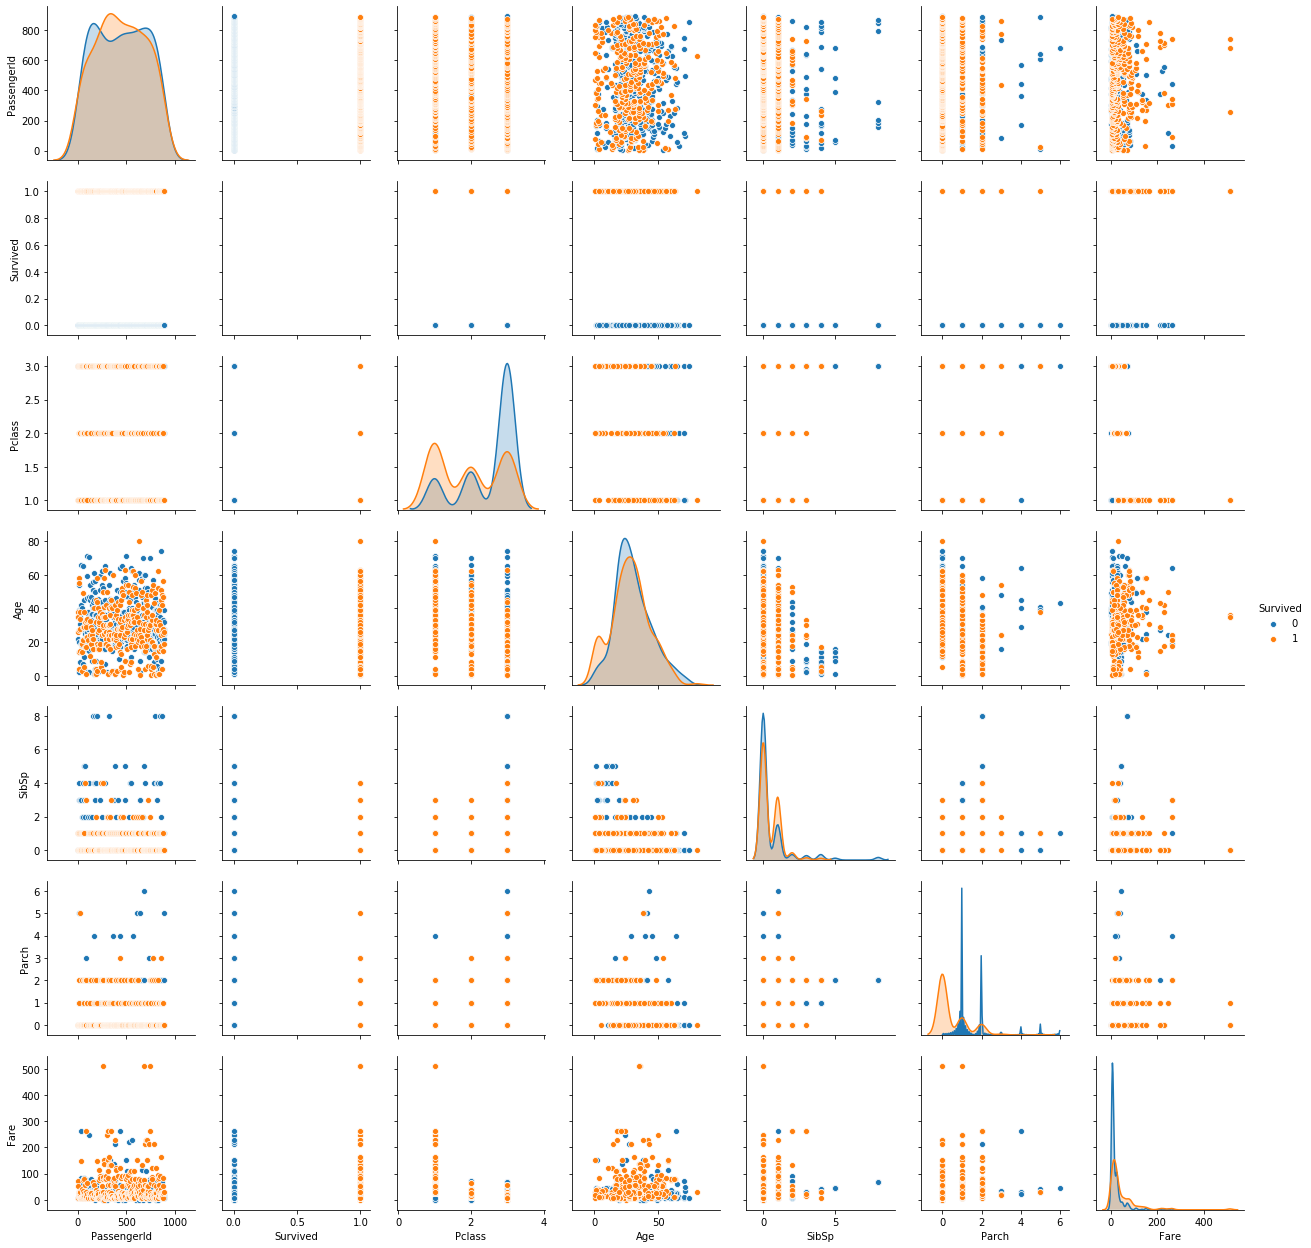

In [6]:
sns.pairplot(df_train,hue="Survived")

In [7]:
df_cat= df_train.select_dtypes(include=np.object) 
df_num= df_train.select_dtypes(include=np.number)

In [8]:
print(df_cat.columns) 
print(df_num.columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


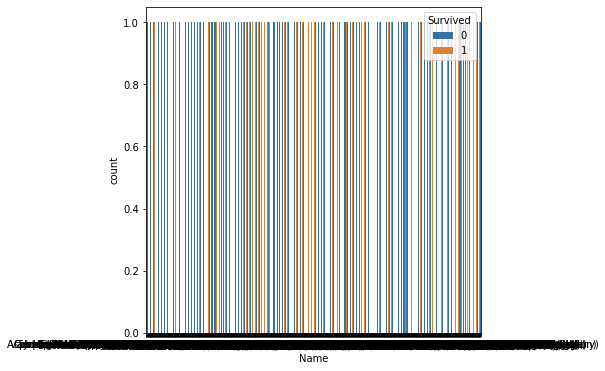

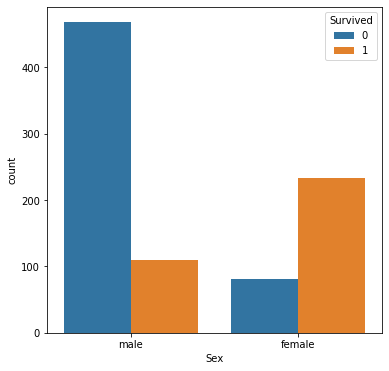

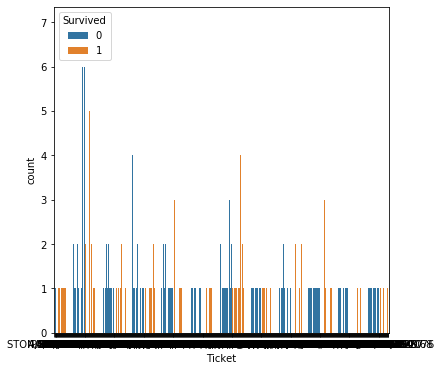

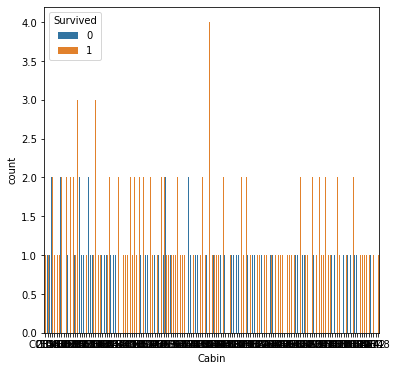

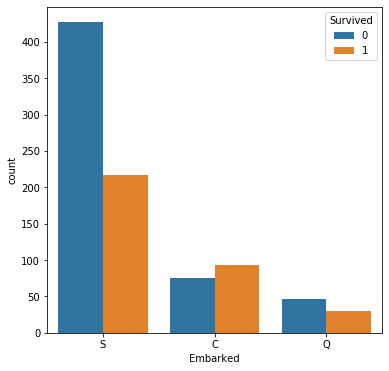

In [9]:
for i in df_cat:
    plt.figure(figsize=(6,6))
    sns.countplot(x=i,hue="Survived", data= df_train)
    plt.show()

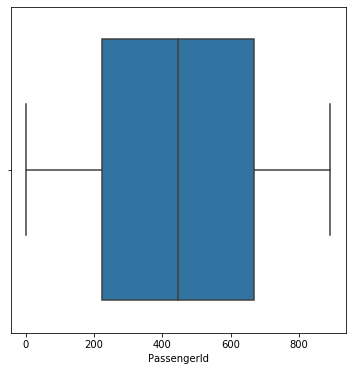

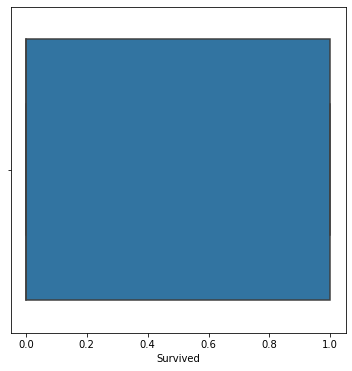

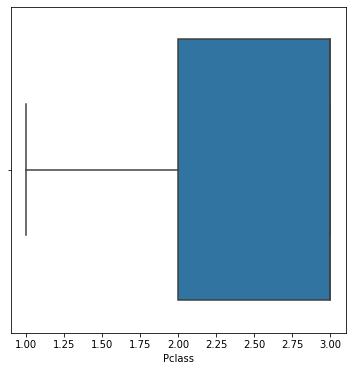

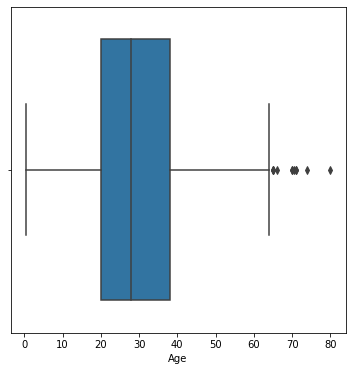

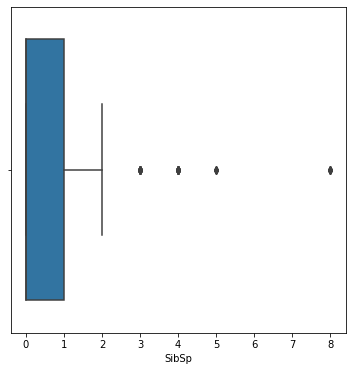

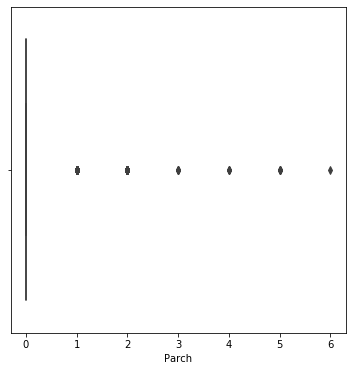

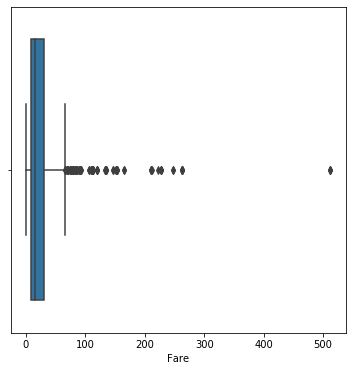

In [10]:
for i in df_num:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=df_num[i])

In [11]:
import pandas_profiling as pp
pp.ProfileReport(df_train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [12]:
df_train.drop(["Cabin","Name","Ticket"],axis=1, inplace= True)

In [13]:
total_missing= df_train.isnull().sum()
percentage_missing= (total_missing/df_train.isnull().count())*100
Nas= pd.concat([total_missing,percentage_missing], axis= 1, keys= ("Total","Percentage"))
Nas

,Total,Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


In [14]:
# As Embarked percentage is less than 1% so we can remove the entire rows of the missing values
df_train.dropna(how="all",axis=0,subset=["Embarked"],inplace= True)

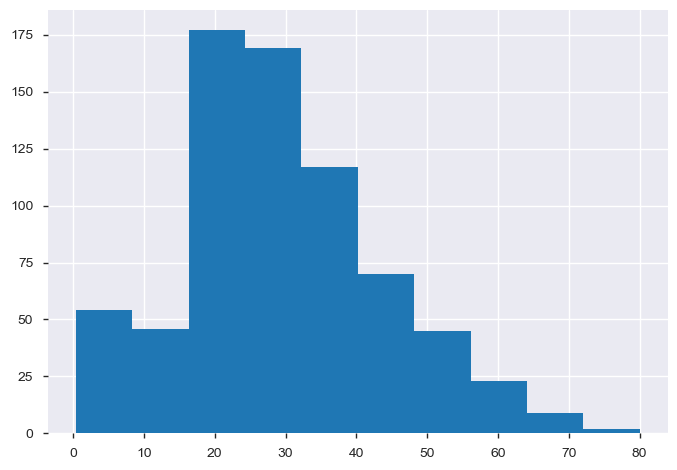

In [15]:
df_train.Age.hist()

In [16]:
# Filling the missing values with median of the age due to skewness
df_train.Age.fillna(df_train["Age"].median(), inplace= True)

In [17]:
print(df_train.isnull().sum())
print(df_train.shape)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 9)


In [18]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.382452,2.311586,NaN,29.315152,0.524184,0.382452,32.096681,NaN
std,256.998173,0.486260,0.834700,NaN,12.984932,1.103705,0.806761,49.697504,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,224.000000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.000000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


C:\New folder\datascience\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


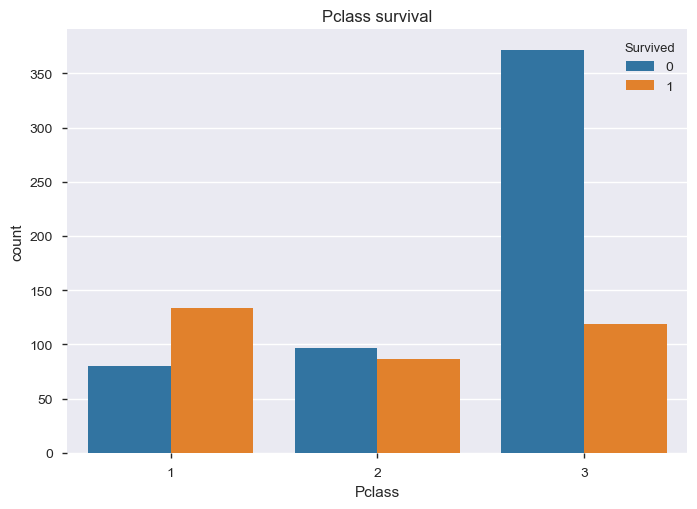

In [19]:
# Among the Pclass data we can conclude that 
# most of the 3rd class died
# & most of the 1st class were saved 
sns.countplot(x="Pclass",hue="Survived", data= df_train)
plt.title("Pclass survival")
plt.show()

C:\New folder\datascience\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


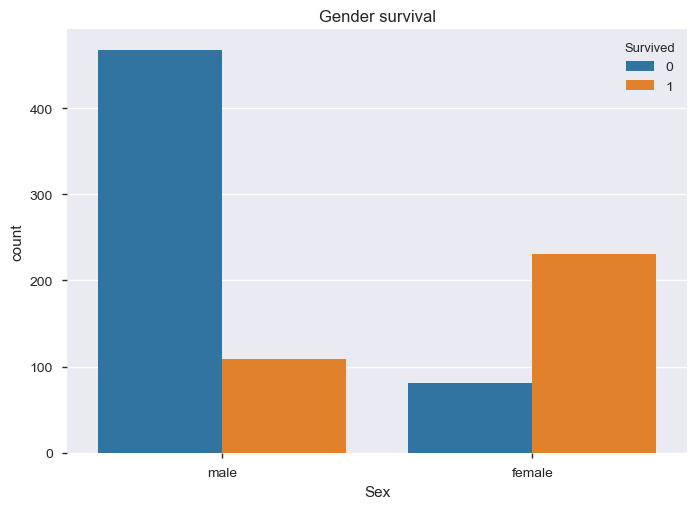

In [20]:
# After Visualizing the Gender Survival data we can say that
# most of the Females were saved & most of the men died 
sns.countplot(x="Sex",hue="Survived", data= df_train)
plt.title("Gender survival")
plt.show()

C:\New folder\datascience\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


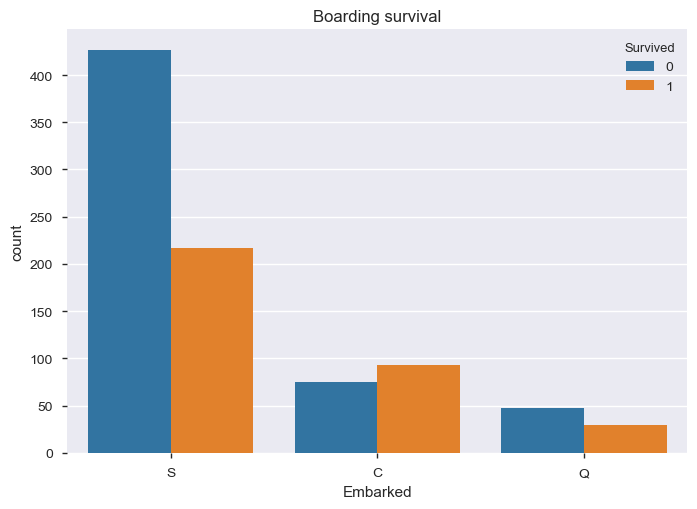

In [21]:
# Most of the person died had embarked from Southampton
sns.countplot(x="Embarked",hue="Survived", data= df_train)
plt.title("Boarding survival")
plt.show()

C:\New folder\datascience\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


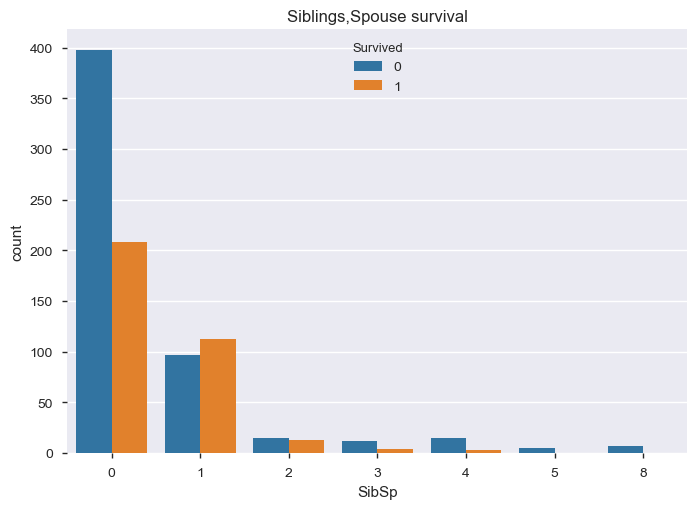

In [22]:
sns.countplot(x="SibSp",hue="Survived", data= df_train)
plt.title("Siblings,Spouse survival")
plt.show()

C:\New folder\datascience\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


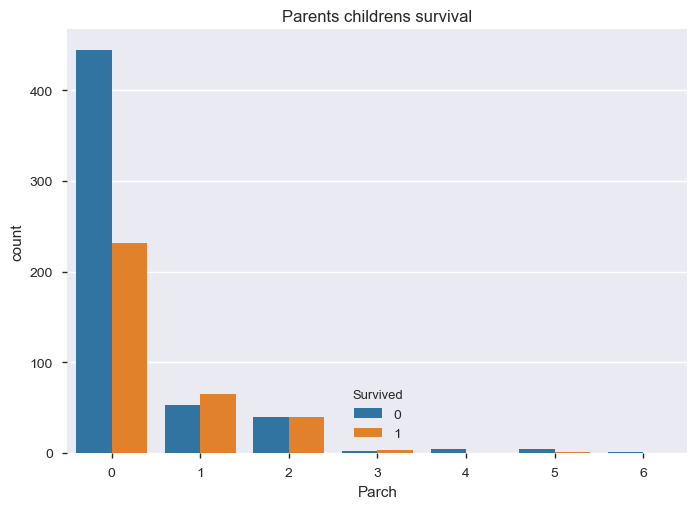

In [23]:
sns.countplot(x="Parch",hue="Survived", data= df_train)
plt.title("Parents childrens survival")
plt.show()

In [24]:
# Female survived the most i.e. 231 & out of 231 1st pclass female survived the most 89
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          89   70   72  231
male   0          77   91  300  468
       1          45   17   47  109
All              214  184  491  889

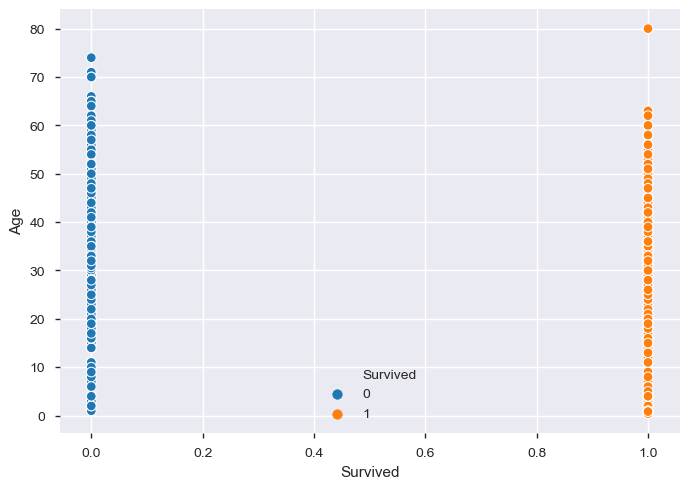

In [25]:
# IN Survived persons one persons age is above 80 
sns.scatterplot(x= "Survived" ,y= "Age", hue= "Survived", data= df_train)

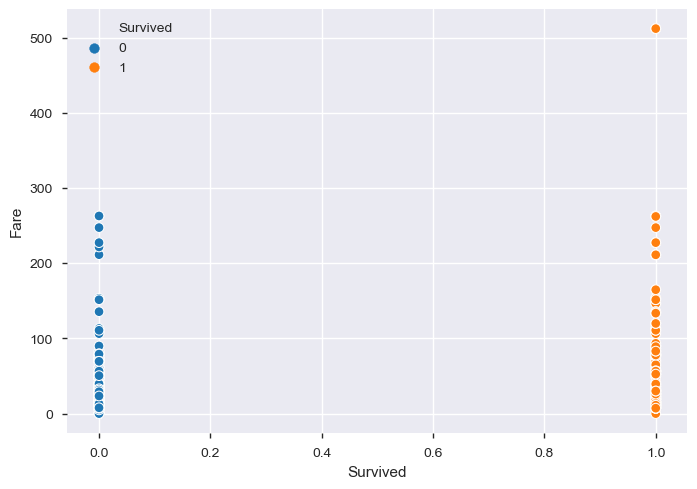

In [26]:
# In survived one person has the fare more than 500
sns.scatterplot(x= "Survived" ,y= "Fare", hue= "Survived", data= df_train)

C:\New folder\datascience\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\New folder\datascience\lib\site-packages\seaborn\axisgrid.py:838: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  func(*plot_args, **plot_kwargs)


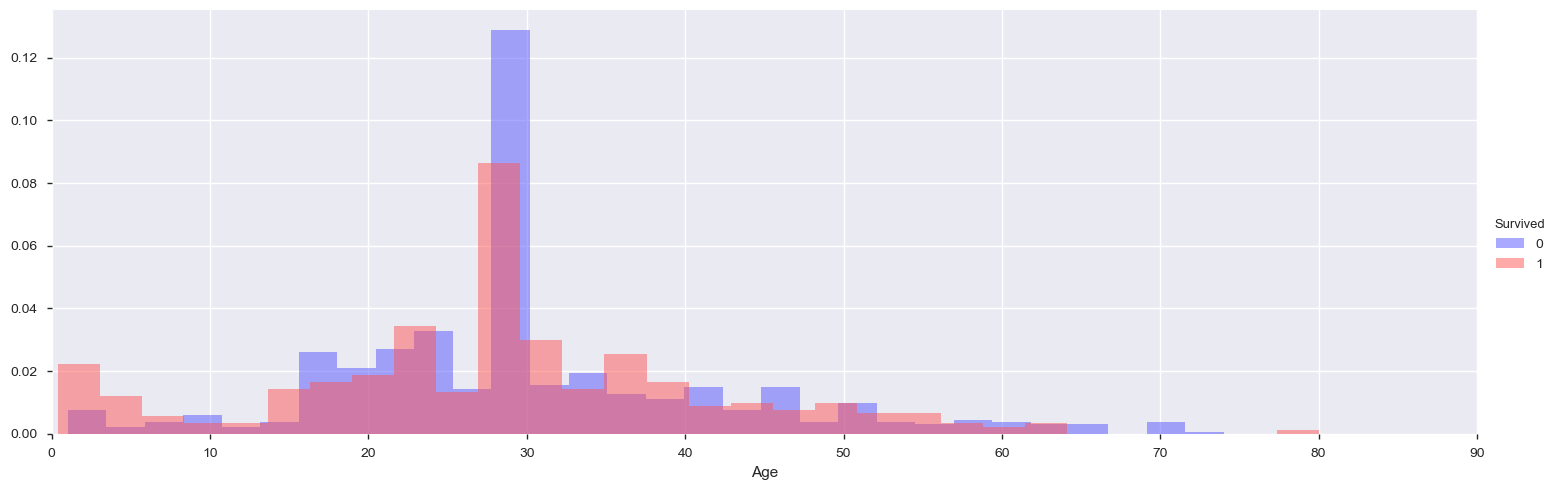

In [27]:
# After Visualizing the grid chart we can say that
# Most of the people saved were of age limit between 20 to 30 & People died in that tragedy were of age 16 to 35
facet = sns.FacetGrid(df_train, hue='Survived',size=5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5,normed=True)
facet.set(xlim=(0,df_train.Age.max()+10))
facet.add_legend()

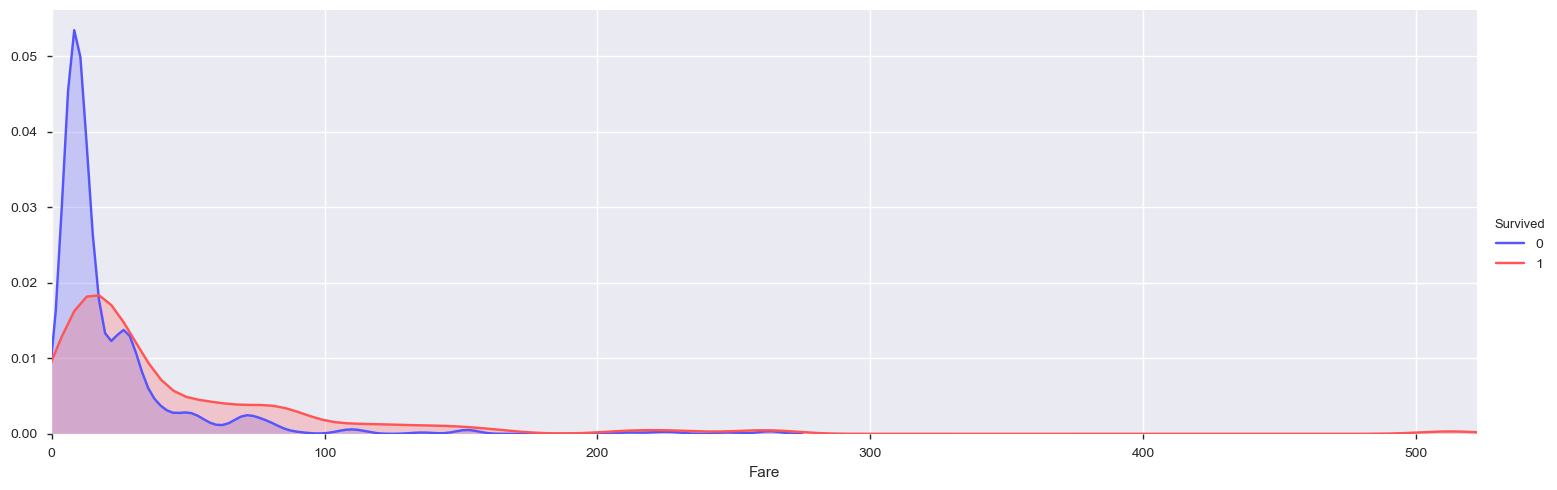

In [28]:
facet = sns.FacetGrid(df_train, hue='Survived',size=5,aspect=3,palette='seismic')
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,df_train.Fare.max()+10))
facet.add_legend()

In [29]:
# Defining the cat & num variables due to dropping out of some variables as they are least important from the df_train dataset
df_cat= df_train.select_dtypes(include=np.object)
df_num= df_train.select_dtypes(include=np.number)

In [30]:
print(df_cat.columns)
df_num.columns

Index(['Sex', 'Embarked'], dtype='object')


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [31]:
df_dummies= pd.get_dummies(df_cat)
df_dummies.head(2)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0


In [32]:
df_train_concat= pd.concat([df_num,df_dummies], axis=1)
df_train_concat.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [122]:
y= df_train_concat["Survived"]
x= df_train_concat.drop(["Survived"], axis=1)

In [125]:
x.shape

(889, 11)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
accuracy= cross_val_score(RandomForestClassifier(),x,y,scoring="accuracy",cv=10)

C:\New folder\datascience\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\ensemble\forest.py:2

In [37]:
accuracy.mean()

0.8189096016343207

In [38]:
from sklearn.linear_model import LogisticRegression
accuracy_1= cross_val_score(LogisticRegression(),x,y,scoring="accuracy",cv=10)
accuracy_1.mean()

C:\New folder\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.7975485188968335

In [39]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_2= cross_val_score(KNeighborsClassifier(),x,y,scoring="accuracy",cv=5)
accuracy_2.mean()

0.5412175458642798

In [40]:
from sklearn.svm import SVC
accuracy_3= cross_val_score(SVC(),x,y,scoring="accuracy",cv=10)
accuracy_3.mean()

C:\New folder\datascience\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\New folder\datascience\lib\site-packages\sklearn\svm\base.py:193: FutureW

0.6130490296220633

In [41]:
param_grid={"n_estimators":[50,100,150,200,250,300,350,400],
           "criterion" :['gini',"entropy"],
           'max_depth': [1, 2, 3, 4, 5,6,7,8],
           'max_features': [1, 2, 3, 4,5,6,7,8,9,10]}
# RandomForestClassifier(
#     n_estimators='warn',
#     criterion='gini',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features='auto',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,
#     random_state=None,
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
# )

In [42]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(RandomForestClassifier(),param_grid,scoring="accuracy")

In [43]:
grid.fit(x,y)

C:\New folder\datascience\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [44]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'n_estimators': 50}

In [45]:
grid.best_score_

0.8245219347581553

In [51]:
from sklearn.metrics import classification_report,log_loss,f1_score, accuracy_score, roc_auc_score

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [56]:
rf= RandomForestClassifier(criterion="gini", max_depth=5, max_features=1, n_estimators=50)

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_pred=rf.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))
print('\n')
print('F1-SCORE : ',f1_score(y_test,y_pred,average=None))
print('\n')
print('Train Accuracy: ', accuracy_score(y_train, rf.predict(X_train))*100,'%')

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       158
           1       0.89      0.65      0.75       109

    accuracy                           0.82       267
   macro avg       0.84      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



F1-SCORE :  [0.86376812 0.75132275]


Train Accuracy:  86.0128617363344 %


In [135]:
df_test = pd.read_csv(r"C:\Users\RAJPAL SINGH\Documents\Data Science ALL\Kaggle\Titanic\test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Faunthorpe, Mr. Harry",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [137]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [138]:
df_test.Age.fillna(df_train["Age"].median(), inplace= True)
df_test.Fare.fillna(df_train["Fare"].median(), inplace= True)

In [139]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [140]:
x1=(df_test.isnull().sum()/df_test.isnull().count())*100
x1

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [141]:
df_test.drop(columns="Cabin",inplace= True)

In [142]:
df_test.drop(["Name","Ticket"],axis=1, inplace= True)

In [143]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [144]:
df_test.select_dtypes(np.object).columns
df_test.select_dtypes(np.number)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
5,897,3,14.0,0,0,9.2250
6,898,3,30.0,0,0,7.6292
7,899,2,26.0,1,1,29.0000
8,900,3,18.0,0,0,7.2292
9,901,3,21.0,2,0,24.1500


In [145]:
df_test = pd.get_dummies(df_test, columns = ['Sex','Embarked'])
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [146]:
x.shape

(889, 11)

In [147]:
rf.fit(x,y)
prediction=rf.predict(df_test)

In [148]:
prediction.shape

(418,)

In [149]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)

In [150]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [151]:
submission = pd.read_csv(r"C:\Users\RAJPAL SINGH\Documents\Data Science ALL\Kaggle\Titanic\my_submission.csv")

In [152]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
